# Kinematic Report Tool

## 1) Setup


### Generate the Kinemtatic Model from a hardpoints file
Edit parameters/hardpoints.yaml, then run the code below

In [1]:
from kinematics.kinematic_model import KinematicModel
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.ticker as FuncFormatter
import numpy as np

kin_model = KinematicModel()
# kin_model.from_hardpoints('parameters/hardpoints.yaml')
steering_delta = [20, 51]
front_left_delta = [-12, 12, 51]
rear_left_delta = [-12, 12, 51]
kin_model.from_xlsx('parameters/HDPT_Export.xlsx', steering_delta, front_left_delta, rear_left_delta)
f = kin_model.front
r = kin_model.rear

## 2) Graphing

### Motion Ratio

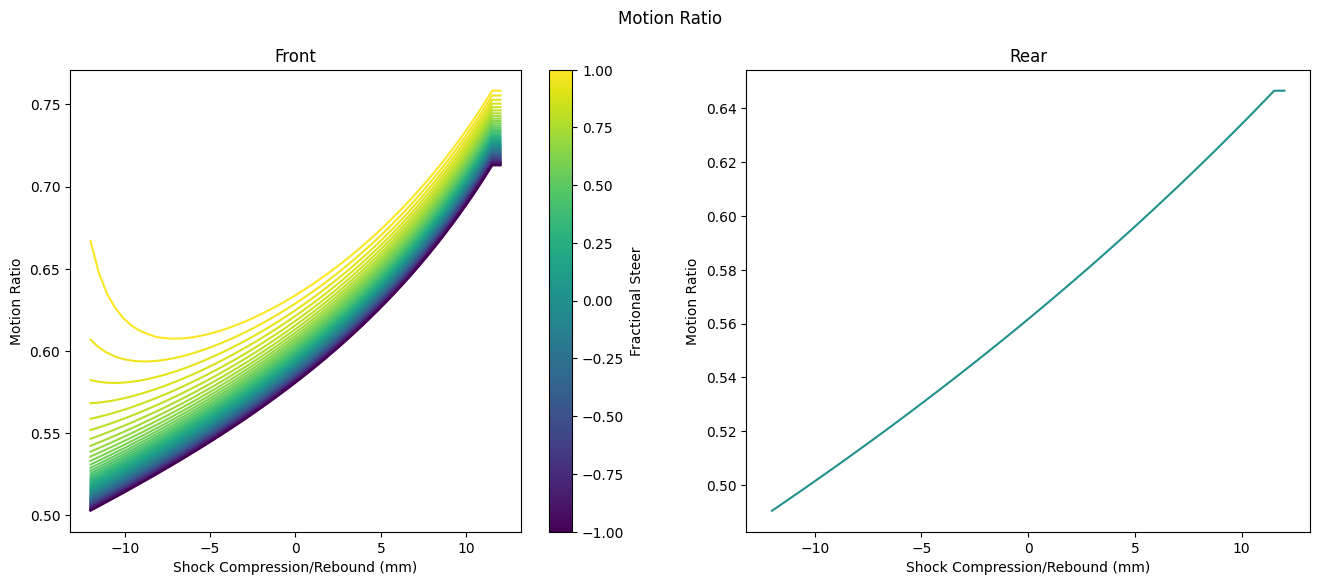

In [2]:
fig = plt.figure(figsize=(16,6))
fig.suptitle('Motion Ratio')
fig.tight_layout()
n = len(f[0,:,0])
colormap = plt.cm.viridis
colors = [colormap(i) for i in np.linspace(1, 0, n)]

norm = mpl.colors.Normalize(vmin=-1,vmax=1)
scalar_mappable = plt.cm.ScalarMappable(cmap=plt.cm.viridis,norm=norm)

ax1 = fig.add_subplot(121)

for i in range(n):
    ax1.plot(f[:,i,0],f[:,i,2])

for i, line in enumerate(ax1.lines):
    # line.set_color(colors[abs(i-n//2)*2])
    line.set_color(colors[i])

ax1.set_xlabel('Shock Compression/Rebound (mm)')
ax1.set_ylabel('Motion Ratio')
ax1.set_title('Front')

ax2 = fig.add_subplot(122)
ax2.plot(r[:,0,0],r[:,0,2],color=colors[n//2])
ax2.set_xlabel('Shock Compression/Rebound (mm)')
ax2.set_ylabel('Motion Ratio')
ax2.set_title('Rear')

cbar = plt.colorbar(scalar_mappable,ax=ax1,label='Fractional Steer');

### Camber Gain and Bump Steer (Neutral Steer)


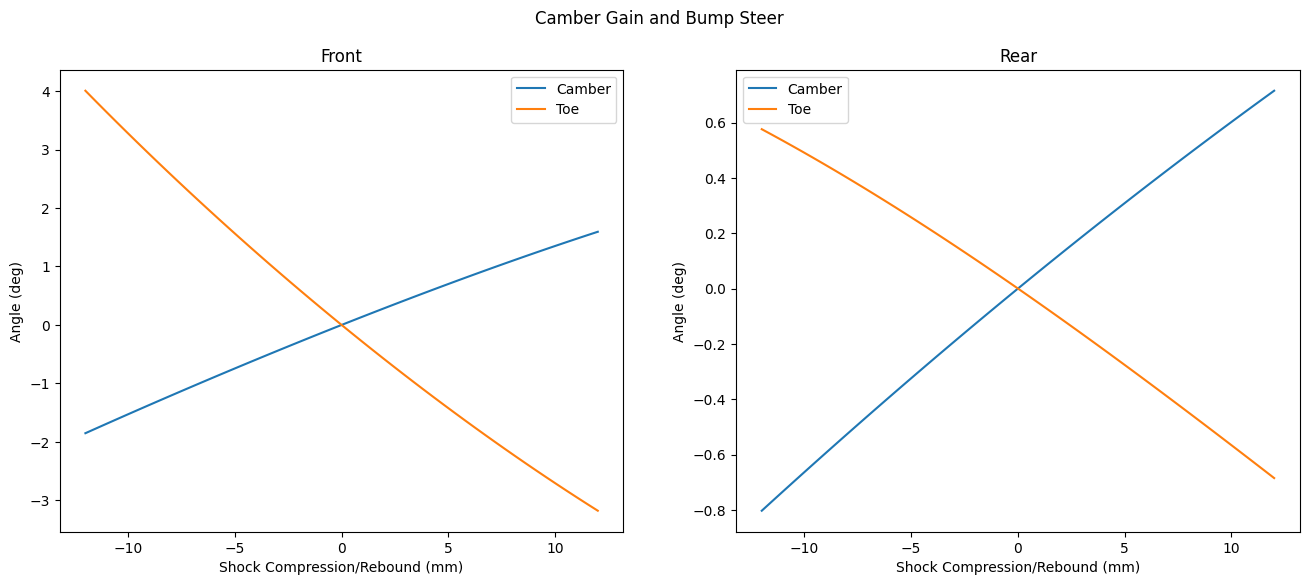

In [3]:
fig = plt.figure(figsize=(16,6))
fig.suptitle('Camber Gain and Bump Steer')
fig.tight_layout()
n = len(f[0,:,0])
ax1 = fig.add_subplot(121)
ax1.plot(f[:,n//2,0],np.rad2deg(f[:,n//2,9]), label = "Camber")
ax1.plot(f[:,n//2,0],np.rad2deg(f[:,n//2,10]), label = "Toe")
ax1.legend()
ax1.set_xlabel('Shock Compression/Rebound (mm)')
ax1.set_ylabel('Angle (deg)')
ax1.set_title('Front')

ax2 = fig.add_subplot(122)
ax2.plot(r[:,0,0],np.rad2deg(r[:,0,9]), label = "Camber")
ax2.plot(r[:,0,0],np.rad2deg(r[:,0,10]), label = "Toe")
ax2.set_xlabel('Shock Compression/Rebound (mm)')
ax2.set_ylabel('Angle (deg)')
ax2.legend()
ax2.set_title('Rear');

### Front Camber Gain (Non-Neutral Steer)

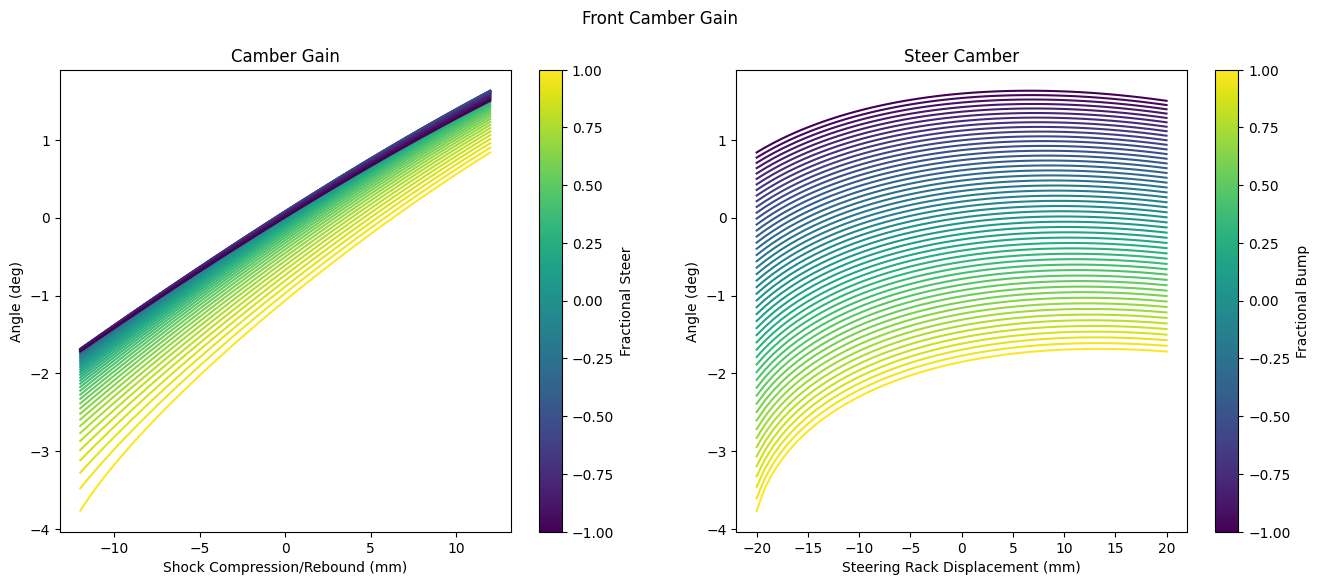

In [4]:
fig = plt.figure(figsize=(16,6))
fig.suptitle('Front Camber Gain')
fig.tight_layout()

n = len(f[0,:,0])
colormap = plt.cm.viridis
colors = [colormap(i) for i in np.linspace(1, 0, n)]
norm = mpl.colors.Normalize(vmin=-1,vmax=1)
scalar_mappable = plt.cm.ScalarMappable(cmap=plt.cm.viridis,norm=norm)

ax1 = fig.add_subplot(121)

for i in range(n):
    ax1.plot(f[:,i,0], np.rad2deg(f[:,i,9]))

for i, line in enumerate(ax1.lines):
    line.set_color(colors[i])

ax1.set_xlabel('Shock Compression/Rebound (mm)')
ax1.set_ylabel('Angle (deg)')
ax1.set_title('Camber Gain')

n = len(f[:,0,0])
colormap = plt.cm.viridis
colors = [colormap(i) for i in np.linspace(1, 0, n)]
norm = mpl.colors.Normalize(vmin=-1,vmax=1)
scalar_mappable = plt.cm.ScalarMappable(cmap=plt.cm.viridis,norm=norm)

ax2 = fig.add_subplot(122)
for i in range(n):
    ax2.plot(f[i,:,1], np.rad2deg(f[i,:,9]))

for i, line in enumerate(ax2.lines):
    line.set_color(colors[i])

ax2.set_xlabel('Steering Rack Displacement (mm)')
ax2.set_ylabel('Angle (deg)')
ax2.set_title('Steer Camber')

cbar = plt.colorbar(scalar_mappable,ax=ax1,label='Fractional Steer')
cbar = plt.colorbar(scalar_mappable,ax=ax2,label='Fractional Bump');

### Steering and Ackermann

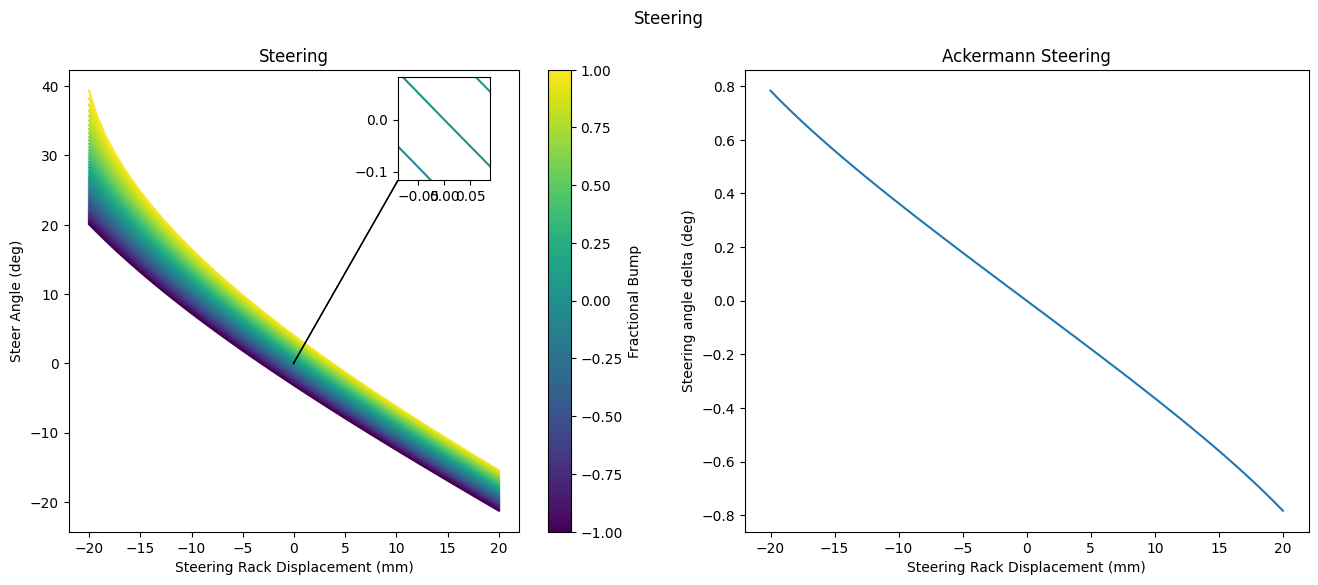

In [5]:
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset

fig = plt.figure(figsize=(16,6))
fig.suptitle('Steering')
fig.tight_layout()
n = len(f[:,0,0])
colormap = plt.cm.viridis
colors = [colormap(i) for i in np.linspace(1, 0, n)]

norm = mpl.colors.Normalize(vmin=-1,vmax=1)
scalar_mappable = plt.cm.ScalarMappable(cmap=plt.cm.viridis,norm=norm)

ax1 = fig.add_subplot(121)

for i in range(n):
    ax1.plot(f[i,:,1], np.rad2deg(f[i,:,10]))

for i, line in enumerate(ax1.lines):
    # line.set_color(colors[abs(i-n//2)*2])
    line.set_color(colors[i])

ax1.set_xlabel('Steering Rack Displacement (mm)')
ax1.set_ylabel('Steer Angle (deg)')
ax1.set_title('Steering')

## EDIT ZOOM LEVEL HERE ###
zoom1 = 75
## EDIT ZOOM POINT HERE [-1,1] ###
t= 0

zoom2 = zoom1*3
ax1_1 = zoomed_inset_axes(ax1, zoom=zoom1, loc='upper right')

for i in range(n):
    ax1_1.plot(f[i,:,1],np.rad2deg(f[i,:,10]))
for i, line in enumerate(ax1_1.lines):
    # line.set_color(colors[abs(i-n//2)*2])
    line.set_color(colors[i])
ax1_1.set_aspect('equal', adjustable='box')
m = len(f[0,:,1])
idx = m//2 + int(t*m/2)
x1, y1 = f[n//2,idx,1], f[n//2,idx,10]

ax1_1.set_xlim(x1 + f[n//2,0,1]/zoom2, x1 + f[n//2,-1,1]/zoom2)
ax1_1.set_ylim(np.rad2deg(y1 - f[n//2,0,10]/zoom2), np.rad2deg(y1 - f[n//2,-1,10]/zoom2))
mark_inset(ax1, ax1_1, loc1=3, loc2=3)

colormap = plt.cm.viridis
colors = [colormap(i) for i in np.linspace(1, 0, n)]

norm = mpl.colors.Normalize(vmin=-1,vmax=1)
scalar_mappable = plt.cm.ScalarMappable(cmap=plt.cm.viridis,norm=norm)
fig.colorbar(scalar_mappable,ax=ax1,label='Fractional Bump')

ackermann = (f[n//2,:,10] - f[n//2,::-1,10])
ax2 = fig.add_subplot(122)
ax2.plot(f[n//2,:,1], ackermann)

ax2.set_xlabel('Steering Rack Displacement (mm)')
ax2.set_ylabel('Steering angle delta (deg)')
ax2.set_title('Ackermann Steering');

### Contact Patch Configuration Spaces

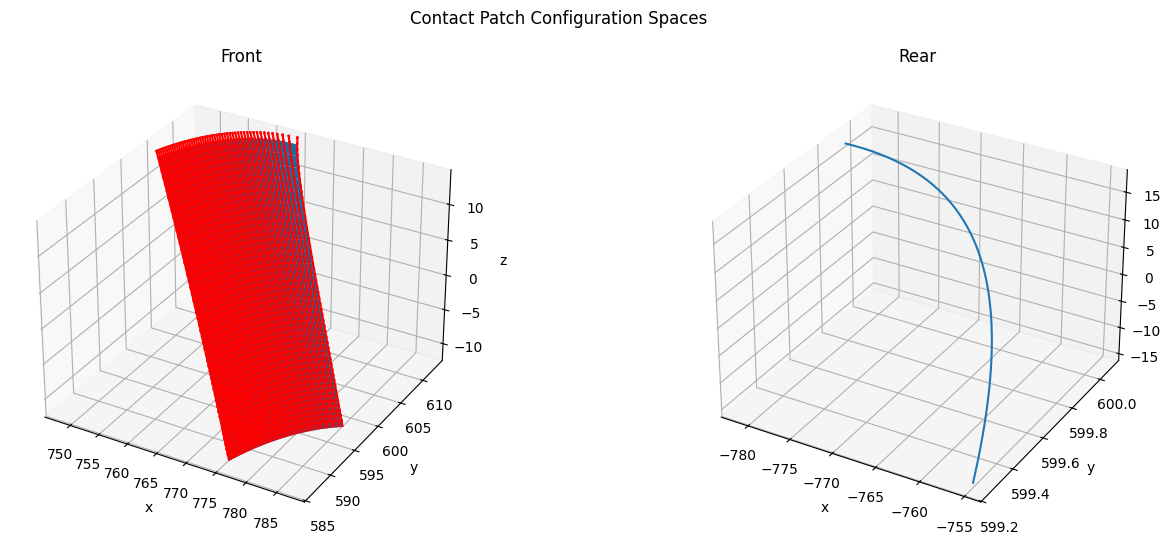

In [6]:
fig = plt.figure(figsize=(16,6))
fig.suptitle('Contact Patch Configuration Spaces')
fig.tight_layout()
ax1 = fig.add_subplot(121,projection="3d")
ax1.plot_surface(f[:,:,3],f[:,:,4],f[:,:,5])
ax1.quiver(f[:,:,3],f[:,:,4],f[:,:,5], f[:,:,6],f[:,:,7],f[:,:,8], length=1, color='r')
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.set_zlabel('z')
ax1.set_title('Front')

ax2 = fig.add_subplot(122,projection="3d")
ax2.plot(r[:,0,3],r[:,0,4],r[:,0,5])
ax2.set_xlabel('x')
ax2.set_ylabel('y')
ax2.set_zlabel('z')
ax2.set_title('Rear');

### Instant Center Migration

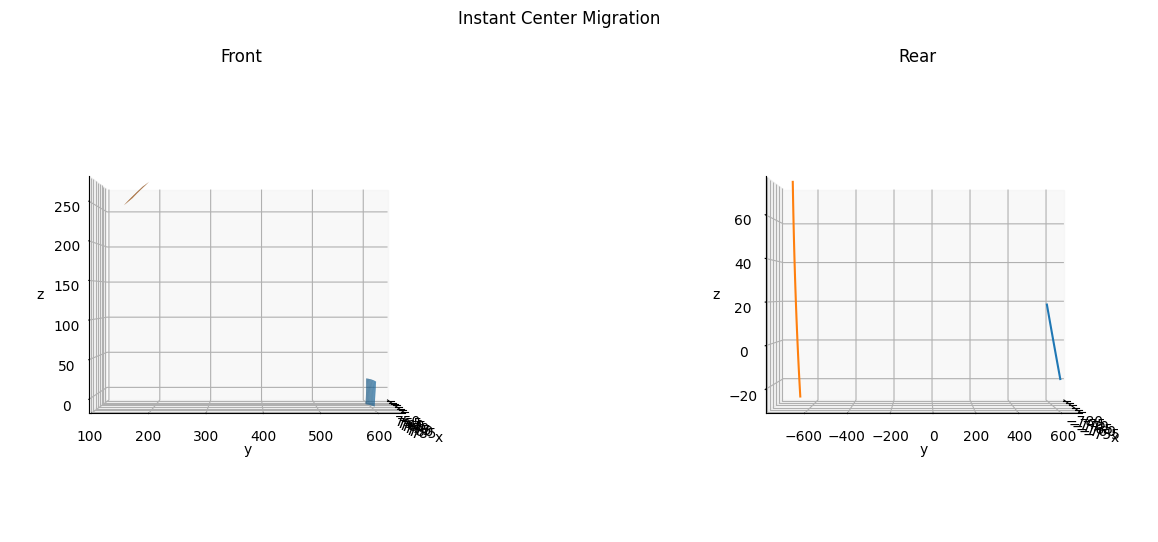

In [7]:
fig = plt.figure(figsize=(16,6))
fig.suptitle('Instant Center Migration')
fig.tight_layout()
ax1 = fig.add_subplot(121,projection="3d")
ax1.plot_surface(f[:,:,3],f[:,:,4],f[:,:,5])
ax1.plot_surface(f[:,:,11],f[:,:,12],f[:,:,13])
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.set_zlabel('z')
ax1.view_init(0,0,0)
ax1.set_title('Front')

ax2 = fig.add_subplot(122,projection="3d")
ax2.plot(r[:,0,3],r[:,0,4],r[:,0,5])
ax2.plot(r[:,0,11],r[:,0,12],r[:,0,13])
ax2.set_xlabel('x')
ax2.set_ylabel('y')
ax2.set_zlabel('z')
ax2.view_init(0,0,0)
ax2.set_title('Rear');


### Roll Center Migration

[[ 767.39266272   -0.77084474  372.55076311]
 [-767.57986025   -9.61261561   12.64345731]]
[[ 767.28517651   -1.54167492  372.71583767]
 [-767.66099816  -19.22626712   12.73753837]]
[[ 767.17754476   -2.31246618  372.87975688]
 [-767.74341119  -28.84778681   12.82365626]]
[[ 767.06977089   -3.08319409  373.04251653]
 [-767.82709755  -38.48403345   12.90178962]]
[[ 766.96186989   -3.85382828  373.20407826]
 [-767.91205624  -48.14191627   12.97190749]]
[[ 766.85405421   -4.62436921  373.36389871]
 [-767.99828703  -57.82841925   13.03396912]]
[[ 766.74610733   -5.3947739   373.52254743]
 [-768.08566783  -67.54700584   13.0880267 ]]
[[ 766.63803288   -6.16501709  373.68002071]
 [-768.17426091  -77.30948218   13.13402758]]
[[ 766.52983453   -6.93507306  373.83631487]
 [-768.264127    -87.12177327   13.17179388]]
[[ 766.42153698   -7.70489827  373.99136001]
 [-768.35526894  -96.9914092    13.20124403]]
[[ 766.31333675   -8.47452759  374.14467684]
 [-768.44769033 -106.92612758   13.22228527]]

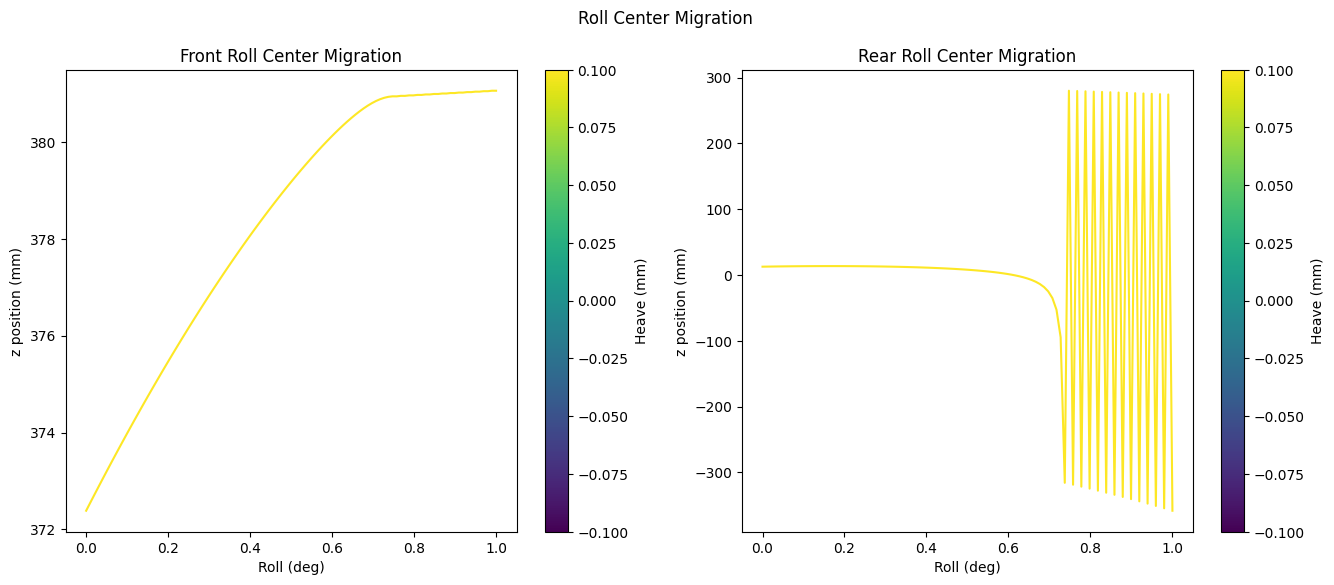

In [9]:
import kinematics.multibody_kinematics as mb_kin
roll_range = 1 # deg
heave_range = [-1,1] # mm
heave_range = [0,0]
roll_steps = 100
heave_steps = 1
roll_space = np.linspace(0, roll_range, roll_steps)
heave_space = np.linspace(heave_range[0], heave_range[1], heave_steps)

rc_z = mb_kin.integrate_roll_axis(kin_model, 0.0, roll_range, roll_steps, heave_range, heave_steps)
fig = plt.figure(figsize=(16,6))
fig.suptitle('Roll Center Migration')
fig.tight_layout()

n = len(rc_z[:,0,0])
colormap = plt.cm.viridis
colors = [colormap(i) for i in np.linspace(1, 0, n)]
norm = mpl.colors.Normalize(vmin=heave_range[0],vmax=heave_range[1])
scalar_mappable = plt.cm.ScalarMappable(cmap=plt.cm.viridis,norm=norm)

ax1 = fig.add_subplot(121)

for i in range(n):
    ax1.plot(roll_space, rc_z[i,:,0])

for i, line in enumerate(ax1.lines):
    line.set_color(colors[i])

ax1.set_xlabel('Roll (deg)')
ax1.set_ylabel('z position (mm)')
ax1.set_title('Front Roll Center Migration')

ax2 = fig.add_subplot(122)

for i in range(n):
    ax2.plot(roll_space, rc_z[i,:,1])

for i, line in enumerate(ax2.lines):
    line.set_color(colors[i])

ax2.set_xlabel('Roll (deg)')
ax2.set_ylabel('z position (mm)')
ax2.set_title('Rear Roll Center Migration')

cbar = plt.colorbar(scalar_mappable,ax=ax1,label='Heave (mm)')
cbar = plt.colorbar(scalar_mappable,ax=ax2,label='Heave (mm)');